In [15]:
%reload_ext vimception

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [16]:
cd ~/workspace/heimdall/

/home/richard/workspace/heimdall


In [17]:
%matplotlib inline
%config IPCompleter.greedy=True
import pylab
pylab.rcParams['figure.figsize'] = [10.0, 8.0]

In [18]:
import heimdall
import astroid
import sys, os
import numpy as np
import logging
logging.getLogger().setLevel(logging.DEBUG)

# Heimdall

In [4]:
heimdall.testHeimdall()

INFO:heimdall:/home/richard/workspace/heimdall/heimdall.py,422 added to shitlist
INFO:heimdall:/home/richard/workspace/heimdall/heimdall.py,422 added to shitlist
INFO:heimdall:/home/richard/workspace/heimdall/heimdall.py,422 added to shitlist
INFO:heimdall:/home/richard/workspace/heimdall/heimdall.py,422 added to shitlist


Call to f
Got a loop in tracker!

INFO:heimdall:/home/richard/workspace/heimdall/heimdall.py,422 added to shitlist
INFO:heimdall:/home/richard/workspace/heimdall/heimdall.py,422 added to shitlist



Call to write

INFO:heimdall:/home/richard/workspace/heimdall/heimdall.py,422 added to shitlist
INFO:heimdall:/home/richard/workspace/heimdall/heimdall.py,422 added to shitlist
INFO:heimdall:/home/richard/workspace/heimdall/heimdall.py,422 added to shitlist
INFO:heimdall:/home/richard/workspace/heimdall/heimdall.py,422 added to shitlist
INFO:heimdall:/home/richard/workspace/heimdall/heimdall.py,422 added to shitlist
INFO:heimdall:/home/richard/workspace/heimdall/heimdall.py,422 added to shitlist
INFO:heimdall:/home/richard/workspace/heimdall/heimdall.py,422 added to shitlist
INFO:heimdall:/home/richard/workspace/heimdall/heimdall.py,422 added to shitlist
INFO:heimdall:/home/richard/workspace/heimdall/heimdall.py,422 added to shitlist
INFO:heimdall:/home/richard/workspace/heimdall/heimdall.py,422 added to shitlist
INFO:heimdall:/home/richard/workspace/heimdall/heimdall.py,422 added to shitlist
INFO:heimdall:/home/richard/workspace/heimdall/heimdall.py,422 added to shitlist
INFO:heimdall:/home/richard/


Call to decode
Call to _check_mp_mode
Call to _is_master_process
(4000, 4000) Call to write
Call to decode
Call to _check_mp_mode
Call to _is_master_process



In [5]:
import pprint
pprint.pprint(_.tracker)
stmts = _.tracker['lines']

{'file': '/home/richard/workspace/heimdall/heimdall.py',
 'idx': 0,
 'lineno': 422,
 'lines': [('/home/richard/workspace/heimdall/heimdall.py', 422, 'line'),
           ('/home/richard/workspace/heimdall/heimdall.py', 422, 'return'),
           ('/home/richard/workspace/heimdall/heimdall.py', 424, 'line'),
           ('/home/richard/workspace/heimdall/heimdall.py', 425, 'line'),
           ('/home/richard/workspace/heimdall/heimdall.py', 426, 'line'),
           ('/home/richard/workspace/heimdall/heimdall.py', 418, 'call'),
           ('/home/richard/workspace/heimdall/heimdall.py', 419, 'line'),
           ('/home/richard/workspace/heimdall/heimdall.py', 420, 'line'),
           ('/home/richard/workspace/heimdall/heimdall.py', 421, 'line')]}


# code_reader

In [18]:
import code_reader, autograd.scipy.signal, ast

class myp:
    def get(self): pass
    
convolve = autograd.scipy.signal.convolve

parser = myp()#
mycode ="""
params = parser.get(param_vector, 'params')
biases = parser.get(param_vector, 'biases')
conv = convolve(inputs, params, axes=([2, 3], [2, 3]), dot_axes = ([1], [0]), mode='valid')
return conv + biases
"""

ve = code_reader.VariableExtractor(globals(), locals())
ve.visit(ast.parse(mycode))
print ve.varnames
print ve.assigned
print ve.possible_impure_funcs

set(['inputs', 'params', 'biases', 'conv', 'param_vector'])
set(['params', 'biases', 'conv'])
set([<autograd.core.primitive object at 0x7f181f53c090>, <bound method myp.get of <__main__.myp instance at 0x7f181f4f3ab8>>])


# data_flow

In [14]:
import astroid, astroid.utils

In [4]:
import data_flow, code_reader
data_flow = reload(data_flow)
code_reader =reload(code_reader)

In [5]:
#%%debug
dfg = data_flow.analyze_flow(stmts)

NameError: name 'stmts' is not defined

Automatic pdb calling has been turned ON


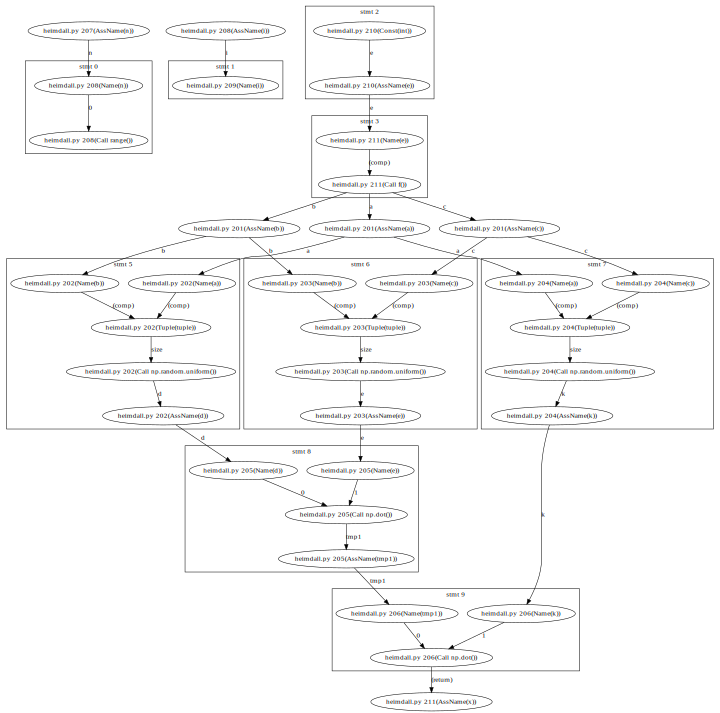

In [55]:
%pdb on 
dfg.draw_digraph(size='10')

In [27]:
for n in dfg.nodes:
    print n, type(n)

heimdall.py 205(Call np.dot()) <class 'data_flow.ExprNode'>
heimdall.py 203(Name(b)) <class 'data_flow.ExprNode'>
heimdall.py 206(Name(k)) <class 'data_flow.ExprNode'>
heimdall.py 202(Name(b)) <class 'data_flow.ExprNode'>
heimdall.py 204(Call np.random.uniform()) <class 'data_flow.ExprNode'>
heimdall.py 211(AssName(x)) <class 'data_flow.Node'>
heimdall.py 209(Name(i)) <class 'data_flow.ExprNode'>
heimdall.py 205(Name(e)) <class 'data_flow.ExprNode'>
heimdall.py 204(Tuple(tuple)) <class 'data_flow.ExprNode'>
heimdall.py 202(Keyword()) <class 'data_flow.ExprNode'>
heimdall.py 201(AssName(a)) <class 'data_flow.VarAssignNode'>
heimdall.py 206(Call np.dot()) <class 'data_flow.Node'>
heimdall.py 206(Name(tmp1)) <class 'data_flow.ExprNode'>
heimdall.py 203(Call np.random.uniform()) <class 'data_flow.ExprNode'>
heimdall.py 204(AssName(k)) <class 'data_flow.VarAssignNode'>
heimdall.py 203(Tuple(tuple)) <class 'data_flow.ExprNode'>
heimdall.py 202(Call np.random.uniform()) <class 'data_flow.Expr

In [111]:
type(dfd)

graphviz.dot.Digraph

In [41]:
for n in dfg.nodes:
    print n, n.stmt_idx, type(n)
print
for e in dfg.edges:
    print e.n1, e.n2, type(e)

heimdall.py 203(Name(b)) 4 <class 'data_flow.VarUseNode'>
heimdall.py 209(CallFunc()) 2 <class 'data_flow.VarUseNode'>
heimdall.py 204(Name(b)) 5 <class 'data_flow.VarUseNode'>
heimdall.py 202(AssName(b)) None <class 'data_flow.VarAssignNode'>
heimdall.py 203(np.random.uniform(size=(a, b))) 4 <class 'data_flow.Node'>
heimdall.py 203(Name(a)) 4 <class 'data_flow.VarUseNode'>
heimdall.py 209(AssName(x)) 8 <class 'data_flow.Node'>
heimdall.py 205(Name(c)) 6 <class 'data_flow.VarUseNode'>
heimdall.py 208(Const(int)) 1 <class 'data_flow.Node'>
heimdall.py 204(Tuple(tuple)) 5 <class 'data_flow.VarUseNode'>
heimdall.py 203(Tuple(tuple)) 4 <class 'data_flow.VarUseNode'>
heimdall.py 204(np.random.uniform(size=(b, a))) 5 <class 'data_flow.Node'>
heimdall.py 204(AssName(d)) 5 <class 'data_flow.VarAssignNode'>
heimdall.py 204(Name(a)) 5 <class 'data_flow.VarUseNode'>
heimdall.py 209(Name(e)) 2 <class 'data_flow.VarUseNode'>
heimdall.py 208(AssName(e)) 1 <class 'data_flow.VarAssignNode'>
heimdall.p

In [17]:
type(list(dfg.nodes)[1])

data_flow.VarUseNode

In [300]:
list(dfg.edges)[8].n2.stmt_idx

1

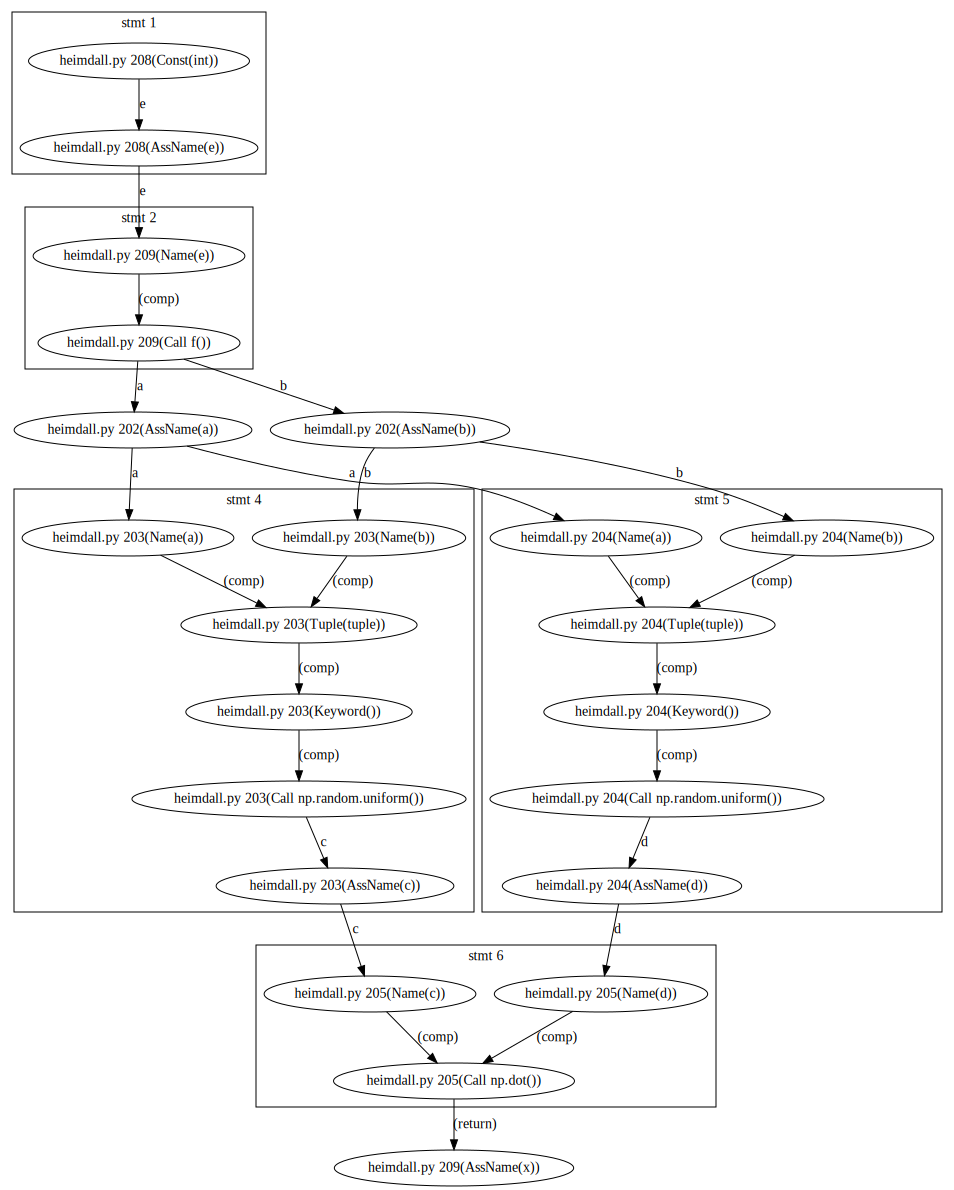

In [131]:
#%%prun -r "testdmp.profile"
dfg.draw_digraph()

In [51]:
import gc
astroid.MANAGER.clear_cache()
gc.collect()

8694

# Optimizer

In [33]:
import code_reader; code_reader = reload(code_reader)
import heimdall; heimdall = reload(heimdall)
import data_flow; data_flow = reload(data_flow)
import watcher; watcher = reload(watcher)
import optimizer; optimizer = reload(optimizer)
import modcode; modcode = reload(modcode)
from tests import code2; code2 = reload(code2)
from tests import code3; code3 = reload(code3)
from tests import code4; code4 = reload(code4)
from tests import code5; code5 = reload(code5)
from tests import code6; code6 = reload(code6)
astroid.MANAGER.clear_cache()

In [25]:
optimizer.DRYRUN = True

In [34]:
%pdb on
heim = heimdall.Heimdall(max_nesting=2, prof_shot_time=4)
heim.run('code5.g(7)', globals(), locals())

Automatic pdb calling has been turned ON
g iter 0 Took 3.291540 seconds, sum is 1141688791576.546631

INFO:heimdall:Null row: ('profile', 0, 'profiler')
DEBUG:heimdall:Found node root: PStatRow( '','profile',0,'code5.g(7)', 1 )



Going to watch for ('/home/richard/workspace/heimdall/tests/code5.py', 'f1')
g iter 1 Took 3.408572 seconds, sum is 1141688791576.546631
Processing  LineExec(stmt_idx=0, filename='/home/richard/workspace/heimdall/tests/code5.py', lineno=18)
New stmt_idx: 1
Next idx: 1
Processing  LineExec(stmt_idx=1, filename='/home/richard/workspace/heimdall/tests/code5.py', lineno=19)
New stmt_idx: 2
Next idx: 2
Processing  LineExec(stmt_idx=2, filename='/home/richard/workspace/heimdall/tests/code5.py', lineno=20)
New stmt_idx: 3
Next idx: 3
Processing  LineExec(stmt_idx=3, filename='/home/richard/workspace/heimdall/tests/code5.py', lineno=21)
New stmt_idx: 4
Next idx: 4
Processing  LineExec(stmt_idx=4, filename='/home/richard/workspace/heimdall/tests/code5.py', lineno=22)
Going to follow_function_call:  func2(j, k) stmt is  4
Processing  LineExec(stmt_idx=5, filename='/home/richard/workspace/heimdall/tests/code5.py', lineno=13)
New stmt_idx: 6
Next idx: 6
Processing  LineExec(stmt_idx=6, filename='

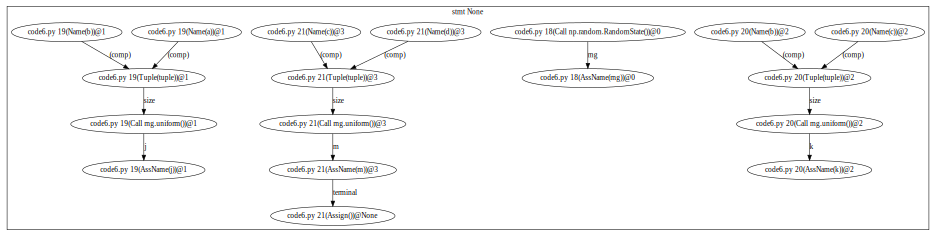

In [30]:
heim.dfg.draw_digraph(size='13', colors={n: 'red' for n in last_subgraph})

In [12]:
list(enumerate(last_stmt_sequence))

[(0, ('/home/richard/workspace/heimdall/tests/code6.py', 18, 'line')),
 (1, ('/home/richard/workspace/heimdall/tests/code6.py', 19, 'line')),
 (2, ('/home/richard/workspace/heimdall/tests/code6.py', 20, 'line')),
 (3, ('/home/richard/workspace/heimdall/tests/code6.py', 21, 'line')),
 (4, ('/home/richard/workspace/heimdall/tests/code6.py', 22, 'line')),
 (5, ('/home/richard/workspace/heimdall/tests/code6.py', 12, 'call')),
 (6, ('/home/richard/workspace/heimdall/tests/code6.py', 14, 'line')),
 (7, ('/home/richard/workspace/heimdall/tests/code6.py', 14, 'return')),
 (8, ('/home/richard/workspace/heimdall/tests/code6.py', 12, 'call')),
 (9, ('/home/richard/workspace/heimdall/tests/code6.py', 14, 'line')),
 (10, ('/home/richard/workspace/heimdall/tests/code6.py', 14, 'return')),
 (11, ('/home/richard/workspace/heimdall/tests/code6.py', 22, 'return'))]

Processing  LineExec(stmt_idx=0, filename='/home/richard/workspace/heimdall/tests/code5.py', lineno=18)
New stmt_idx: 1
Next idx: 1
Processing  LineExec(stmt_idx=1, filename='/home/richard/workspace/heimdall/tests/code5.py', lineno=19)
New stmt_idx: 2
Next idx: 2
Processing  LineExec(stmt_idx=2, filename='/home/richard/workspace/heimdall/tests/code5.py', lineno=20)
New stmt_idx: 3
Next idx: 3
Processing  LineExec(stmt_idx=3, filename='/home/richard/workspace/heimdall/tests/code5.py', lineno=21)
New stmt_idx: 4
Next idx: 4
Processing  LineExec(stmt_idx=4, filename='/home/richard/workspace/heimdall/tests/code5.py', lineno=22)
Going to follow_function_call:  func2(j, k) stmt is  4
Processing  LineExec(stmt_idx=5, filename='/home/richard/workspace/heimdall/tests/code5.py', lineno=13)
New stmt_idx: 6
Next idx: 6
Processing  LineExec(stmt_idx=6, filename='/home/richard/workspace/heimdall/tests/code5.py', lineno=14)
New stmt_idx: 7
Next idx: 7
Going to follow_function_call:  func2(func2(j, k)

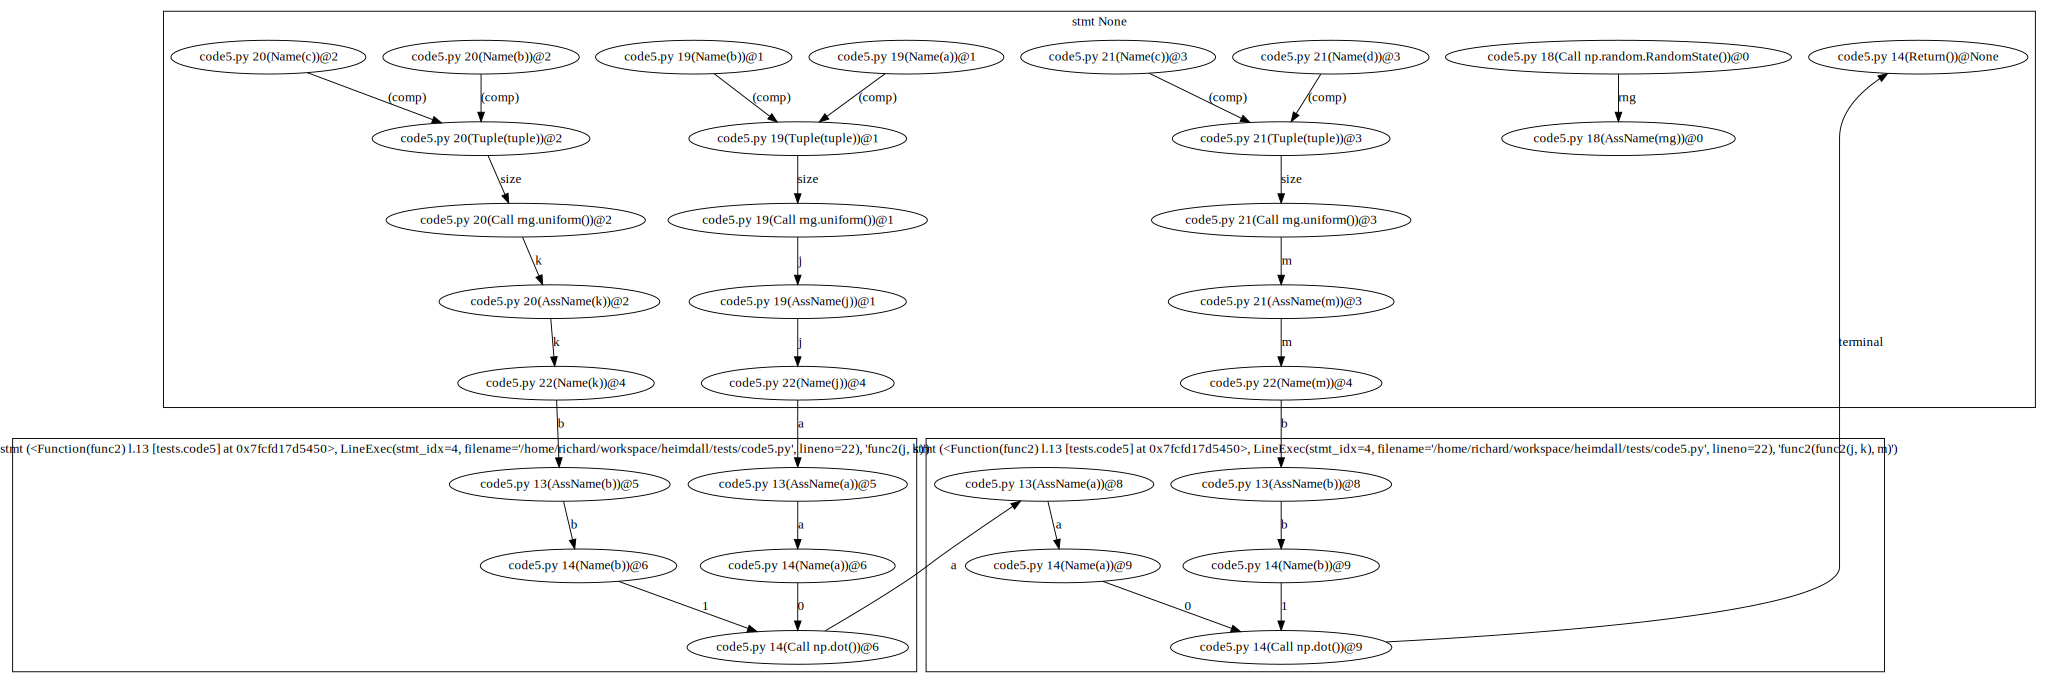

In [32]:
data_flow.analyze_flow(last_stmt_sequence, heim.watcher.loopstats).draw_digraph()

In [26]:
%pdb on
modcode.replace_subgraph_and_code(heim.dfg, last_subgraph, input_nodes, new_chain_expr, assumptions)

Automatic pdb calling has been turned ON
prepare_statement visiting  3
prepare_statement visiting  4


AttributeError: 'Class' object has no attribute 'args'

> /usr/local/lib/python2.7/dist-packages/astroid-1.3.6-py2.7.egg/astroid/bases.py(73)__getattr__()
     72             return self.__dict__[name]
---> 73         return getattr(self._proxied, name)
     74 

ipdb> up
> /home/richard/workspace/heimdall/modcode.py(544)prepare_statement_with_internal_calls()
    543                     else:
--> 544                         noneconst.parent=new_callfunc.args
    545                         new_callfunc.args[i] = noneconst

ipdb> print new_callfunc
Const(NoneType)
ipdb> print path
['value', 'args', 0]
ipdb> print sn
code5.py 22(Call func2())@4
ipdb> print sn.ast_node
CallFunc()
ipdb> print sn.ast_node.as_string()
func2(j, k)
ipdb> print new_callfunc.as_string()
None
ipdb> print stmt_copy
Return()
ipdb> print smt
*** NameError: name 'smt' is not defined
ipdb> print stmt
Return()
ipdb> print stmt_copy.as_string()
return func2(None, None, j2=j, k3=k, m4=m, behavior15=2)
ipdb> print stmt.as_string()
return func2(func2(j, k), m)
ipdb> l
    539 

In [7]:
%qtconsole

In [49]:
[(n, type(n), n.ast_node) for n in heim.dfg.nodes if 'func2' in str(n)]

[(code3.py 16(Call func2()),
  data_flow.ExprNode,
  <CallFunc() l.16 [tests.code3] at 0x7f8cf41bfc50>)]

In [17]:
import matrix_chain
matrix_chain = reload(matrix_chain)
matrix_chain.matrix_chain_tree([(500,2500),(2500,4000), (4000,1000)])

In [99]:
import gc; gc.collect()
#astroid.MANAGER.clear_cache()

9

In [ ]:
sizes = []
for o in gc.get_objects():
    try:
        size= asizeof.asizeof(o)
        if size > 10000000:
            print o,size
            sizes.append((o,size ))
    except:
        pass

In [53]:
heim.dfg.nodes

{<ExprNode: code4.py 17(Call np.random.RandomState())@0>,
 <ExprNode: code4.py 18(Name(a))@1>,
 <ExprNode: code4.py 18(Name(rng))@1>,
 <ExprNode: code4.py 18(Getattr(uniform))@1>,
 <ExprNode: code4.py 18(Tuple(tuple))@1>,
 <ExprNode: code4.py 18(Name(b))@1>,
 <ExprNode: code4.py 19(Name(b))@2>,
 <ExprNode: code4.py 19(Tuple(tuple))@2>,
 <ExprNode: code4.py 19(Name(rng))@2>,
 <ExprNode: code4.py 19(Getattr(uniform))@2>,
 <ExprNode: code4.py 20(Name(c))@3>,
 <ExprNode: code4.py 19(Name(c))@2>,
 <ExprNode: code4.py 20(Name(rng))@3>,
 <ExprNode: code4.py 20(Getattr(uniform))@3>,
 <ExprNode: code4.py 20(Tuple(tuple))@3>,
 <ExprNode: code4.py 20(Name(d))@3>,
 <ExprNode: code4.py 21(Name(j))@4>,
 <ExprNode: code4.py 21(Name(k))@4>,
 <ExprNode: code4.py 13(Name(a))@6>,
 <ExprNode: code4.py 13(Name(b))@6>,
 <ExprNode: code4.py 13(Call np.dot())@7>,
 <ExprNode: code4.py 22(Name(m))@8>,
 <ExprNode: code4.py 22(Name(t1))@8>,
 <ExprNode: code4.py 13(Name(b))@10>,
 <ExprNode: code4.py 13(Name(a))@10

In [102]:
import astroid
astroid = reload(astroid)

ImportError: cannot import name inference

In [100]:
import objgraph

In [101]:
objgraph.show_most_common_types(limit=20)

function                   17517
list                       12700
dict                       11122
tuple                      4409
weakref                    2558
Arguments                  2050
Function                   2050
wrapper_descriptor         1806
type                       1633
builtin_function_or_method 1594
getset_descriptor          1409
method_descriptor          1113
module                     996
FontEntry                  740
cell                       724
set                        465
member_descriptor          456
property                   435
instance                   411
instancemethod             348


In [55]:
heim = None

In [91]:
import random
import objgraph
objgraph.show_backrefs([objgraph.by_type('Arguments')[random.randint(0,2000)]], max_depth=15)

Graph written to objects.dot (361 nodes)
Image generated as objects.png


In [73]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [70]:
obj

<Arguments() l.0 [__builtin__] at 0x7f3913732fd0>

In [84]:
dir(str.lstrip)

['__call__',
 '__class__',
 '__delattr__',
 '__doc__',
 '__format__',
 '__get__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__name__',
 '__new__',
 '__objclass__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [85]:
str.lstrip.__dict__

AttributeError: 'method_descriptor' object has no attribute '__dict__'

In [89]:
str.__dict__

<dictproxy {'__add__': <slot wrapper '__add__' of 'str' objects>,
 '__contains__': <slot wrapper '__contains__' of 'str' objects>,
 '__doc__': "str(object='') -> string\n\nReturn a nice string representation of the object.\nIf the argument is a string, the return value is the same object.",
 '__eq__': <slot wrapper '__eq__' of 'str' objects>,
 '__format__': <method '__format__' of 'str' objects>,
 '__ge__': <slot wrapper '__ge__' of 'str' objects>,
 '__getattribute__': <slot wrapper '__getattribute__' of 'str' objects>,
 '__getitem__': <slot wrapper '__getitem__' of 'str' objects>,
 '__getnewargs__': <method '__getnewargs__' of 'str' objects>,
 '__getslice__': <slot wrapper '__getslice__' of 'str' objects>,
 '__gt__': <slot wrapper '__gt__' of 'str' objects>,
 '__hash__': <slot wrapper '__hash__' of 'str' objects>,
 '__le__': <slot wrapper '__le__' of 'str' objects>,
 '__len__': <slot wrapper '__len__' of 'str' objects>,
 '__lt__': <slot wrapper '__lt__' of 'str' objects>,
 '__mod__': 

In [92]:
import sys

In [95]:
del sys.modules['astroid']